In [1]:
%matplotlib inline
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from e11.fit import Gauss2D, Gauss2DAngle
from e11.plot import subplots_xy, imshow_xy, contour_xy

## 2D Gaussian

In [2]:
Gauss2D.get_signature()

<Signature (x, y, x0, y0, amp, width, offset)>

In [3]:
# generate data
ny, nx = (96, 128)
xvals = np.arange(nx)
yvals = np.arange(ny)
X, Y = np.meshgrid(xvals, yvals)
p0 = [71, 49, 16, 6, 2]
Z = Gauss2D.func(X, Y, *p0) + 0.8 * np.random.randn(*X.shape)

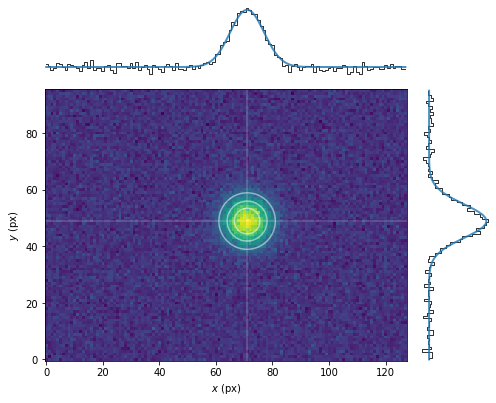

In [4]:
# fit
g = Gauss2D(X, Y, Z)
popt = g.fit()
coord = (popt[0], popt[1])
quarters = popt[2] * np.array([0.25, 0.5, 0.75]) + popt[-1]

# xy slice plots
fig, axes = subplots_xy(figsize=(7, 7), size_xy=1)

# data
imshow_xy(axes, coord, Z,
          cmap="viridis",
          origin="lower",
          xy_limits="data",
          add_lines=True,
          line_kw={"color":"white", "alpha":0.2},
          step_kw={"color":"black", "alpha":0.8, "linewidth":1})

# best fit
contour_xy(axes, coord, g.best_fit,
           levels=quarters,
           colors='w',
           alpha=0.5,
           plot_kw={"lw":2, "alpha":0.8})

# format
axes[0].set_xlabel("$x$ (px)")
axes[0].set_ylabel("$y$ (px)")
plt.tight_layout()
plt.show()

In [5]:
# fit info
print(g.text())

xy = (71.03, 48.91) 
amplitude = 15.98 
FWHM = 14.11 
offset = 2.00


## Asymmetric 2D Gaussian

In [6]:
Gauss2DAngle.get_signature()

<Signature (x, y, x0, y0, amp, width, epsilon, angle, offset)>

In [7]:
# generate data
p0 = [61.4, 35.1, 16.5, 6.1, 1.2, -2, 2]
Z = Gauss2DAngle.func(X, Y, *p0) + 0.8 * np.random.randn(*X.shape)

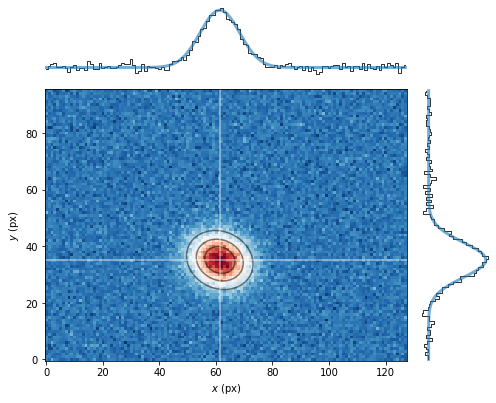

In [8]:
# fit
a = Gauss2DAngle(X, Y, Z)
popt = a.fit()
coord = (popt[0], popt[1])
quarters = popt[2] * np.array([0.25, 0.5, 0.75]) + popt[-1]

# xy slice plots
fig, axes = subplots_xy(figsize=(7, 7), size_xy=1)

# data
imshow_xy(axes, coord, Z,
          cmap="RdBu_r",
          origin="lower",
          xy_limits="data",
          add_lines=True,
          line_kw={"color":"white", "alpha":0.4, "linewidth":2},
          step_kw={"color":"black", "alpha":0.8, "linewidth":1})

# best fit
contour_xy(axes, coord, a.best_fit,
           levels=quarters,
           colors='k',
           alpha=0.5,
           plot_kw={"lw":3, "color":'C0', "alpha":0.6})

# format
axes[0].set_xlabel("$x$ (px)")
axes[0].set_ylabel("$y$ (px)")
plt.tight_layout()
plt.show()

In [9]:
print(a.text())

xy = (61.38, 35.13) 
amplitude = 16.68 
FWHM = 15.58 
epsilon = 0.83 
angle = -0.43 
offset = 2.00
